<a href="https://colab.research.google.com/github/Luqman0033/Tools_project/blob/main/Tools_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

print("Upload 4 files:")
uploaded = files.upload()

dataframes = []

for file_name in uploaded.keys():
    if file_name.endswith(".csv"):
        df = pd.read_csv(file_name)
    elif file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        df = pd.read_excel(file_name)
    else:
        print(f"Unsupported file: {file_name}")
        continue

    print(f"\nLoaded: {file_name}")
    print(df.head())
    dataframes.append(df)

# Assign to variables
if len(dataframes) >= 4:
    df1, df2, df3, df4 = dataframes[:4]

print("\nFiles loaded successfully!")


Upload 4 files:


Saving NIFTY_50.csv to NIFTY_50.csv
Saving NIFTY_50_COMPANIES.csv to NIFTY_50_COMPANIES.csv
Saving SENSEX.csv to SENSEX.csv
Saving SENSEX_COMPANIES.csv to SENSEX_COMPANIES.csv

Loaded: NIFTY_50.csv
         Date    Adj Close        Close         High          Low  \
0  2007-09-17  4494.649902  4494.649902  4549.049805  4482.850098   
1  2007-09-18  4546.200195  4546.200195  4551.799805  4481.549805   
2  2007-09-19  4732.350098  4732.350098  4739.000000  4550.250000   
3  2007-09-20  4747.549805  4747.549805  4760.850098  4721.149902   
4  2007-09-21  4837.549805  4837.549805  4855.700195  4733.700195   

          Open  Volume  SMA_20  SMA_50       EMA_12       EMA_26       MACD  \
0  4518.450195       0     NaN     NaN  4494.649902  4494.649902   0.000000   
1  4494.100098       0     NaN     NaN  4502.580717  4498.468443   4.112274   
2  4550.250000       0     NaN     NaN  4537.929852  4515.793010  22.136843   
3  4734.850098       0     NaN     NaN  4570.179076  4532.960180  37.21

In [2]:
# Cell 1 - Imports and helpers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.api.types import is_numeric_dtype, is_string_dtype, is_datetime64_any_dtype
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
import re
import seaborn as sns
sns.set(style="whitegrid", rc={'figure.figsize':(8,4)})

# Helper: convert column names to snake_case and strip
def clean_column_names(df):
    df = df.copy()
    def to_snake(s):
        s = str(s).strip()
        s = re.sub(r'[^\w\s]', '', s)       # remove punctuation
        s = re.sub(r'\s+', '_', s)         # spaces to _
        s = re.sub(r'(?<!^)(?=[A-Z])', '_', s)  # camelCase -> snake_case
        return s.lower()
    df.columns = [to_snake(c) for c in df.columns]
    return df

# Helper: quick summary
def quick_summary(df, name="df"):
    print(f"=== Summary for {name} ===")
    print("Rows, cols:", df.shape)
    print("\nColumn types:")
    display(pd.DataFrame(df.dtypes, columns=["dtype"]))
    print("\nMissing value counts (top 20):")
    display(df.isna().sum().sort_values(ascending=False).head(20))
    print("\nSample:")
    display(df.head())
    print("\nValue counts for object columns (up to 5 cols):")
    obj_cols = [c for c in df.columns if is_string_dtype(df[c])][:5]
    for c in obj_cols:
        print(f"--- {c} ---")
        display(df[c].value_counts(dropna=False).head(10))


In [3]:
# Cell 2 - Clean column names for each df (if they exist)
for i, name in enumerate(['df1','df2','df3','df4'], start=1):
    if name in globals():
        globals()[name] = clean_column_names(globals()[name])
        print(f"Cleaned columns for {name}: {globals()[name].shape}")
    else:
        print(f"{name} not found in environment")

# Quick check
for name in ['df1','df2','df3','df4']:
    if name in globals():
        print("\n", name, "columns:", globals()[name].columns.tolist()[:10])


Cleaned columns for df1: (4452, 18)
Cleaned columns for df2: (304543, 19)
Cleaned columns for df3: (6987, 18)
Cleaned columns for df4: (180327, 19)

 df1 columns: ['date', 'adj__close', 'close', 'high', 'low', 'open', 'volume', 's_m_a_20', 's_m_a_50', 'e_m_a_12']

 df2 columns: ['date', 'adj__close', 'close', 'high', 'low', 'open', 'volume', 'ticker', 's_m_a_20', 's_m_a_50']

 df3 columns: ['date', 'adj__close', 'close', 'high', 'low', 'open', 'volume', 's_m_a_20', 's_m_a_50', 'e_m_a_12']

 df4 columns: ['date', 'adj__close', 'close', 'high', 'low', 'open', 'volume', 'ticker', 's_m_a_20', 's_m_a_50']


In [4]:
# Cell 3 - Quick summaries for each df
for name in ['df1','df2','df3','df4']:
    if name in globals():
        quick_summary(globals()[name], name=name)
    else:
        print(f"{name} not available")


=== Summary for df1 ===
Rows, cols: (4452, 18)

Column types:


,dtype
date,object
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,int64
s_m_a_20,float64
s_m_a_50,float64
e_m_a_12,float64



Missing value counts (top 20):


,0
s_m_a_50,49
s_m_a_20,19
b_b__mid,19
b_b__upper,19
b_b__lower,19
r_s_i_14,13
daily__return_,1
date,0
adj__close,0
close,0



Sample:


,date,adj__close,close,high,low,open,volume,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0,NaN,NaN,4494.649902,4494.649902,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0,NaN,NaN,4502.580717,4498.468443,4.112274,0.822455,NaN,NaN,NaN,NaN,1.146926
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0,NaN,NaN,4537.929852,4515.793010,22.136843,5.085332,NaN,NaN,NaN,NaN,4.094626
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0,NaN,NaN,4570.179076,4532.960180,37.218896,11.512045,NaN,NaN,NaN,NaN,0.321187
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0,NaN,NaN,4611.313034,4555.522374,55.790660,20.367768,NaN,NaN,NaN,NaN,1.895715



Value counts for object columns (up to 5 cols):
--- date ---


,count
date,
2025-11-11,1
2007-09-17,1
2007-09-18,1
2007-09-19,1
2025-09-12,1
2025-09-15,1
2025-09-16,1
2025-09-17,1
2025-09-18,1


=== Summary for df2 ===
Rows, cols: (304543, 19)

Column types:


,dtype
date,object
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,int64
ticker,object
s_m_a_20,float64
s_m_a_50,float64



Missing value counts (top 20):


,0
r_s_i_14,2697
s_m_a_50,2499
b_b__lower,969
b_b__mid,969
b_b__upper,969
s_m_a_20,969
daily__return_,51
close,0
adj__close,0
date,0



Sample:


,date,adj__close,close,high,low,open,volume,ticker,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,1997-07-01,8.918703,13.056603,13.345798,12.924502,13.281532,442137352,RELIANCE.NS,NaN,NaN,13.056603,13.056603,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,1997-07-02,9.027228,13.215482,13.456477,13.138720,13.226193,352633783,RELIANCE.NS,NaN,NaN,13.081046,13.068372,0.012674,0.002535,NaN,NaN,NaN,NaN,1.216843
2,1997-07-03,8.907730,13.040537,13.263681,12.999478,13.147646,225940109,RELIANCE.NS,NaN,NaN,13.074814,13.066310,0.008504,0.003729,NaN,NaN,NaN,NaN,-1.323787
3,1997-07-04,8.754085,12.815608,13.111943,12.735276,13.076240,309913338,RELIANCE.NS,NaN,NaN,13.034936,13.047740,-0.012804,0.000422,NaN,NaN,NaN,NaN,-1.724844
4,1997-07-07,8.788230,12.865592,13.040537,12.758483,12.781690,275138993,RELIANCE.NS,NaN,NaN,13.008883,13.034247,-0.025364,-0.004735,NaN,NaN,NaN,NaN,0.390024



Value counts for object columns (up to 5 cols):
--- date ---


,count
date,
2025-10-07,51
2025-11-11,51
2025-09-15,51
2025-09-16,51
2025-09-17,51
2025-09-18,51
2025-09-19,51
2025-09-22,51
2025-09-23,51


--- ticker ---


,count
ticker,
INFY.NS,7108
HINDUNILVR.NS,7108
HDFCBANK.NS,7108
TITAN.NS,7108
SUNPHARMA.NS,7108
WIPRO.NS,7108
TATASTEEL.NS,7108
BRITANNIA.NS,7108
HINDALCO.NS,7108


=== Summary for df3 ===
Rows, cols: (6987, 18)

Column types:


,dtype
date,object
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,int64
s_m_a_20,float64
s_m_a_50,float64
e_m_a_12,float64



Missing value counts (top 20):


,0
s_m_a_50,49
s_m_a_20,19
b_b__mid,19
b_b__upper,19
b_b__lower,19
r_s_i_14,13
daily__return_,1
date,0
adj__close,0
close,0



Sample:


,date,adj__close,close,high,low,open,volume,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,1997-07-01,4300.859863,4300.859863,4301.770020,4247.660156,4263.109863,0,NaN,NaN,4300.859863,4300.859863,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,1997-07-02,4333.899902,4333.899902,4395.310059,4295.399902,4302.959961,0,NaN,NaN,4305.942946,4303.307274,2.635673,0.527135,NaN,NaN,NaN,NaN,0.768219
2,1997-07-03,4323.459961,4323.459961,4393.290039,4299.970215,4335.790039,0,NaN,NaN,4308.637872,4304.800065,3.837806,1.189269,NaN,NaN,NaN,NaN,-0.240890
3,1997-07-04,4323.819824,4323.819824,4347.589844,4300.580078,4332.700195,0,NaN,NaN,4310.973557,4306.208936,4.764620,1.904339,NaN,NaN,NaN,NaN,0.008324
4,1997-07-07,4291.450195,4291.450195,4391.009766,4289.490234,4326.810059,0,NaN,NaN,4307.969963,4305.115696,2.854266,2.094325,NaN,NaN,NaN,NaN,-0.748635



Value counts for object columns (up to 5 cols):
--- date ---


,count
date,
2025-11-11,1
1997-07-01,1
1997-07-02,1
1997-07-03,1
1997-07-04,1
1997-07-07,1
1997-07-08,1
1997-07-09,1
1997-07-10,1


=== Summary for df4 ===
Rows, cols: (180327, 19)

Column types:


,dtype
date,object
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,int64
ticker,object
s_m_a_20,float64
s_m_a_50,float64



Missing value counts (top 20):


,0
r_s_i_14,3465
s_m_a_50,1470
b_b__lower,570
b_b__mid,570
b_b__upper,570
s_m_a_20,570
daily__return_,30
close,0
adj__close,0
date,0



Sample:


,date,adj__close,close,high,low,open,volume,ticker,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,2000-01-04,8.775805,33.612499,33.612499,33.612499,33.612499,12800,RELIANCE.BO,NaN,NaN,33.612499,33.612499,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,8.876978,34.000000,34.000000,34.000000,34.000000,837136,RELIANCE.BO,NaN,NaN,33.672115,33.641203,0.030912,0.006182,NaN,NaN,NaN,NaN,1.152847
2,2000-01-12,9.497059,36.375000,36.375000,36.375000,36.375000,8400,RELIANCE.BO,NaN,NaN,34.087943,33.843706,0.244237,0.053793,NaN,NaN,NaN,NaN,6.985294
3,2000-02-07,11.329567,43.393749,43.393749,43.393749,43.393749,16000,RELIANCE.BO,NaN,NaN,35.519606,34.551117,0.968489,0.236732,NaN,NaN,NaN,NaN,19.295531
4,2000-02-14,11.748938,45.000000,45.000000,45.000000,45.000000,4000,RELIANCE.BO,NaN,NaN,36.978128,35.325108,1.653020,0.519990,NaN,NaN,NaN,NaN,3.701572



Value counts for object columns (up to 5 cols):
--- date ---


,count
date,
2025-11-10,30
2025-11-11,30
2025-10-28,30
2025-10-29,30
2025-10-30,30
2025-10-31,30
2025-11-03,30
2025-11-04,30
2025-11-06,30


--- ticker ---


,count
ticker,
HDFCBANK.BO,6447
NESTLEIND.BO,6447
TATASTEEL.BO,6428
TITAN.BO,6422
TATAMOTORS.BO,6421
ITC.BO,6421
M&M.BO,6421
SBIN.BO,6420
SUNPHARMA.BO,6420


In [5]:
# Cell 4 - Trim whitespace in string columns and turn empty strings into NaN
def tidy_strings(df):
    for c in df.select_dtypes(include=['object', 'string']).columns:
        df[c] = df[c].astype(str).str.strip()
        # convert common empty markers to NaN
        df[c] = df[c].replace({'': np.nan, 'nan': np.nan, 'None': np.nan, 'NULL': np.nan, 'null': np.nan})
    return df

for name in ['df1','df2','df3','df4']:
    if name in globals():
        globals()[name] = tidy_strings(globals()[name])
        print(f"Trimmed strings for {name}")


Trimmed strings for df1
Trimmed strings for df2
Trimmed strings for df3
Trimmed strings for df4


In [6]:
# Cell 5 - Auto-detect and parse date columns
import dateutil

def try_parse_dates(df, sample_n=50):
    df = df.copy()
    for c in df.columns:
        if df[c].dtype == object:
            # sample non-null values and try parse
            sample = df[c].dropna().astype(str).head(sample_n)
            if sample.empty:
                continue
            success = 0
            for v in sample:
                try:
                    _ = dateutil.parser.parse(v, fuzzy=False)
                    success += 1
                except Exception:
                    pass
            # if a high fraction parsed -> convert
            if success / len(sample) >= 0.6:
                try:
                    df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=False)
                    print(f"Parsed {c} as datetime (converted {df[c].notna().sum()} non-null)")
                except Exception as e:
                    print("Failed parse ", c, e)
    return df

for name in ['df1','df2','df3','df4']:
    if name in globals():
        globals()[name] = try_parse_dates(globals()[name])


Parsed date as datetime (converted 4452 non-null)
Parsed date as datetime (converted 304543 non-null)
Parsed date as datetime (converted 6987 non-null)
Parsed date as datetime (converted 180327 non-null)


In [7]:
# Cell 6 - Convert numeric-like object columns to numeric
def numericify(df):
    for c in df.columns:
        if df[c].dtype == object:
            # remove common formatting characters and try convert
            sample = df[c].dropna().astype(str).head(50)
            if sample.empty:
                continue
            # detect if majority of sample looks numeric (after removing comma, percent, $)
            cleaned = sample.str.replace(r'[,\$\%]', '', regex=True).str.replace(r'\s+', '', regex=True)
            numeric_count = cleaned.apply(lambda x: bool(re.match(r'^-?\d+(\.\d+)?$', x)))
            if numeric_count.mean() >= 0.6:
                df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[,\$\%]', '', regex=True), errors='coerce')
                print(f"Converted {c} -> numeric (non-null: {df[c].notna().sum()})")
    return df

for name in ['df1','df2','df3','df4']:
    if name in globals():
        globals()[name] = numericify(globals()[name])


In [8]:
# Cell 7 - Duplicates
for name in ['df1','df2','df3','df4']:
    if name in globals():
        df = globals()[name]
        dup_count = df.duplicated().sum()
        print(f"{name}: {dup_count} exact duplicate rows")
        if dup_count > 0:
            print(df[df.duplicated()].head())
            # drop duplicates in place
            globals()[name] = df.drop_duplicates().reset_index(drop=True)
            print(f"Dropped duplicates in {name}. New shape: {globals()[name].shape}")


df1: 0 exact duplicate rows
df2: 0 exact duplicate rows
df3: 0 exact duplicate rows
df4: 0 exact duplicate rows


In [9]:
# Cell 8 - Missing value handling: drop columns with >60% missing, impute the rest sensibly
DROP_COL_THRESHOLD = 0.60

def handle_missing(df, drop_thresh=DROP_COL_THRESHOLD):
    df = df.copy()
    missing_frac = df.isna().mean()
    to_drop = missing_frac[missing_frac > drop_thresh].index.tolist()
    if to_drop:
        print("Dropping columns (too many missing):", to_drop)
        df.drop(columns=to_drop, inplace=True)
    # Impute numeric with median
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols:
        median_imputer = SimpleImputer(strategy='median')
        df[num_cols] = pd.DataFrame(median_imputer.fit_transform(df[num_cols]), columns=num_cols)
    # Impute categorical (object) with mode
    obj_cols = df.select_dtypes(include=['object','string']).columns.tolist()
    for c in obj_cols:
        if df[c].isna().any():
            mode = df[c].mode(dropna=True)
            if not mode.empty:
                df[c].fillna(mode[0], inplace=True)
            else:
                df[c].fillna("unknown", inplace=True)
    return df

for name in ['df1','df2','df3','df4']:
    if name in globals():
        before_shape = globals()[name].shape
        globals()[name] = handle_missing(globals()[name])
        print(f"{name}: {before_shape} -> {globals()[name].shape} after missing handling")


df1: (4452, 18) -> (4452, 18) after missing handling
df2: (304543, 19) -> (304543, 19) after missing handling
df3: (6987, 18) -> (6987, 18) after missing handling
df4: (180327, 19) -> (180327, 19) after missing handling


In [10]:
# Cell 9 - Outlier capping using IQR winsorization
def cap_outliers_iqr(df, cols=None, multiplier=1.5):
    df = df.copy()
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for c in cols:
        if c not in df.columns:
            continue
        col = df[c].dropna()
        if col.empty:
            continue
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - multiplier * iqr
        upper = q3 + multiplier * iqr
        # show basic stats
        low_count = (df[c] < lower).sum()
        high_count = (df[c] > upper).sum()
        if low_count + high_count > 0:
            print(f"{c}: {low_count} below lower, {high_count} above upper. Capping to [{lower}, {upper}]")
            df[c] = np.where(df[c] < lower, lower, df[c])
            df[c] = np.where(df[c] > upper, upper, df[c])
    return df

for name in ['df1','df2','df3','df4']:
    if name in globals():
        globals()[name] = cap_outliers_iqr(globals()[name])


volume: 0 below lower, 104 above upper. Capping to [-438637.5, 731062.5]
m_a_c_d: 86 below lower, 99 above upper. Capping to [-256.49928996119365, 318.60535235819384]
signal__line: 82 below lower, 122 above upper. Capping to [-238.6677259758217, 297.9856755692273]
r_s_i_14: 6 below lower, 0 above upper. Capping to [4.126558724514815, 105.22149734746127]
daily__return_: 139 below lower, 123 above upper. Capping to [-2.296365082703622, 2.4267353539663694]
adj__close: 0 below lower, 32596 above upper. Capping to [-971.2941932678223, 1789.1227073669434]
close: 0 below lower, 33024 above upper. Capping to [-1006.6809043884277, 1892.4085426330566]
high: 0 below lower, 33036 above upper. Capping to [-1018.6175765991211, 1916.7705459594727]
low: 0 below lower, 33011 above upper. Capping to [-994.9832534790039, 1868.9899520874023]
open: 0 below lower, 32977 above upper. Capping to [-1007.4437465667725, 1894.0662479400635]
volume: 0 below lower, 31098 above upper. Capping to [-10136357.25, 18614

In [11]:
# Cell 10 - Categorical cleaning and show encoding examples
from sklearn.preprocessing import OneHotEncoder

def clean_categoricals(df):
    df = df.copy()
    for c in df.select_dtypes(include=['object','string']).columns:
        df[c] = df[c].astype(str).str.strip().str.lower().replace({'nan': np.nan})
    return df

# Apply cleaning
for name in ['df1','df2','df3','df4']:
    if name in globals():
        globals()[name] = clean_categoricals(globals()[name])
        print(f"Cleaned categorical strings in {name}")

# Example: how to one-hot encode a short list of columns (not executed globally)
example_cat_cols = []
for name in ['df1','df2','df3','df4']:
    if name in globals():
        df = globals()[name]
        # pick up to 2 object cols with small cardinality
        obj_cols = [c for c in df.select_dtypes(include=['object','string']).columns if df[c].nunique() <= 10][:2]
        if obj_cols:
            example_cat_cols = obj_cols
            print(name, "example one-hot cols:", obj_cols)
            break

if example_cat_cols:
    # one-hot encode example (safe for small cardinality)
    oh = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
    # fit_transform on df1 (change accordingly)
    # encoded = oh.fit_transform(df1[example_cat_cols])
    # encoded_df = pd.DataFrame(encoded, columns=oh.get_feature_names_out(example_cat_cols), index=df1.index)
    # df1 = pd.concat([df1.drop(columns=example_cat_cols), encoded_df], axis=1)
    print("Example code provided (commented) to one-hot encode.")
else:
    print("No low-cardinality categorical columns found for example one-hot encoding.")


Cleaned categorical strings in df1
Cleaned categorical strings in df2
Cleaned categorical strings in df3
Cleaned categorical strings in df4
No low-cardinality categorical columns found for example one-hot encoding.


In [12]:
# Cell 11 - Safe merge example (only if join-key exists)
# Strategy: find common column names between df1 and df2 that look like an id or key
if 'df1' in globals() and 'df2' in globals():
    common_cols = set(df1.columns).intersection(set(df2.columns))
    # prefer columns with 'id' or 'key' in their name
    preferred = [c for c in common_cols if 'id' in c or 'key' in c]
    if preferred:
        join_col = preferred[0]
        print("Merging df1 and df2 on", join_col)
        merged_12 = df1.merge(df2, how='left', on=join_col, suffixes=('_1','_2'))
        print("Merged shape:", merged_12.shape)
        display(merged_12.head())
    else:
        print("No obvious id/key columns in common. Common columns (sample):", list(common_cols)[:10])


Merging df1 and df2 on b_b__mid
Merged shape: (4452, 36)


,date_1,adj__close_1,close_1,high_1,low_1,open_1,volume_1,s_m_a_20_1,s_m_a_50_1,e_m_a_12_1,...,s_m_a_20_2,s_m_a_50_2,e_m_a_12_2,e_m_a_26_2,m_a_c_d_2,signal__line_2,r_s_i_14_2,b_b__upper_2,b_b__lower_2,daily__return__2
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0.0,8662.24502,8652.656973,4494.649902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0.0,8662.24502,8652.656973,4502.580717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0.0,8662.24502,8652.656973,4537.929852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0.0,8662.24502,8652.656973,4570.179076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0.0,8662.24502,8652.656973,4611.313034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Cell 12 - Feature engineering examples
def add_basic_features(df):
    df = df.copy()
    # date features for any datetime columns
    for c in df.select_dtypes(include=['datetime64']).columns:
        df[c + '_year']  = df[c].dt.year
        df[c + '_month'] = df[c].dt.month
        df[c + '_day']   = df[c].dt.day
        df[c + '_weekday'] = df[c].dt.weekday
    # text length features for string columns
    for c in df.select_dtypes(include=['object','string']).columns:
        df[c + '_len'] = df[c].astype(str).map(len)
    return df

# Apply to df1 as a sample (you can apply to others)
if 'df1' in globals():
    df1 = add_basic_features(df1)
    print("Added basic engineered features to df1. New shape:", df1.shape)
    display(df1.head())


Added basic engineered features to df1. New shape: (4452, 22)


,date,adj__close,close,high,low,open,volume,s_m_a_20,s_m_a_50,e_m_a_12,...,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_,date_year,date_month,date_day,date_weekday
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0.0,8662.24502,8652.656973,4494.649902,...,0.000000,53.989733,8662.24502,8945.163989,8369.340667,0.064495,2007,9,17,0
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0.0,8662.24502,8652.656973,4502.580717,...,0.822455,53.989733,8662.24502,8945.163989,8369.340667,1.146926,2007,9,18,1
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0.0,8662.24502,8652.656973,4537.929852,...,5.085332,53.989733,8662.24502,8945.163989,8369.340667,2.426735,2007,9,19,2
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0.0,8662.24502,8652.656973,4570.179076,...,11.512045,53.989733,8662.24502,8945.163989,8369.340667,0.321187,2007,9,20,3
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0.0,8662.24502,8652.656973,4611.313034,...,20.367768,53.989733,8662.24502,8945.163989,8369.340667,1.895715,2007,9,21,4


In [14]:
# Cell 13 - Final check and save
for name in ['df1','df2','df3','df4']:
    if name in globals():
        print("\nFinal check for", name)
        quick_summary(globals()[name], name=name)
        # Save to CSV
        out_name = f"{name}_cleaned.csv"
        globals()[name].to_csv(out_name, index=False)
        print("Saved", out_name)

# Download helper (Colab) - uncomment to download files to your PC
from google.colab import files
# for name in ['df1','df2','df3','df4']:
#     if name in globals():
#         files.download(f"{name}_cleaned.csv")
print("Saved cleaned CSVs to Colab file system. Use files.download(...) in Colab to download to your PC.")



Final check for df1
=== Summary for df1 ===
Rows, cols: (4452, 22)

Column types:


,dtype
date,datetime64[ns]
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,float64
s_m_a_20,float64
s_m_a_50,float64
e_m_a_12,float64



Missing value counts (top 20):


,0
date,0
adj__close,0
close,0
high,0
low,0
open,0
volume,0
s_m_a_20,0
s_m_a_50,0
e_m_a_12,0



Sample:


,date,adj__close,close,high,low,open,volume,s_m_a_20,s_m_a_50,e_m_a_12,...,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_,date_year,date_month,date_day,date_weekday
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0.0,8662.24502,8652.656973,4494.649902,...,0.000000,53.989733,8662.24502,8945.163989,8369.340667,0.064495,2007,9,17,0
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0.0,8662.24502,8652.656973,4502.580717,...,0.822455,53.989733,8662.24502,8945.163989,8369.340667,1.146926,2007,9,18,1
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0.0,8662.24502,8652.656973,4537.929852,...,5.085332,53.989733,8662.24502,8945.163989,8369.340667,2.426735,2007,9,19,2
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0.0,8662.24502,8652.656973,4570.179076,...,11.512045,53.989733,8662.24502,8945.163989,8369.340667,0.321187,2007,9,20,3
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0.0,8662.24502,8652.656973,4611.313034,...,20.367768,53.989733,8662.24502,8945.163989,8369.340667,1.895715,2007,9,21,4



Value counts for object columns (up to 5 cols):
Saved df1_cleaned.csv

Final check for df2
=== Summary for df2 ===
Rows, cols: (304543, 19)

Column types:


,dtype
date,datetime64[ns]
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,float64
ticker,object
s_m_a_20,float64
s_m_a_50,float64



Missing value counts (top 20):


,0
date,0
adj__close,0
close,0
high,0
low,0
open,0
volume,0
ticker,0
s_m_a_20,0
s_m_a_50,0



Sample:


,date,adj__close,close,high,low,open,volume,ticker,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,1997-07-01,8.918703,13.056603,13.345798,12.924502,13.281532,18614308.75,reliance.ns,259.337813,258.566452,13.056603,13.056603,0.000000,0.000000,52.733099,259.337813,276.443763,240.85405,0.000000
1,1997-07-02,9.027228,13.215482,13.456477,13.138720,13.226193,18614308.75,reliance.ns,259.337813,258.566452,13.081046,13.068372,0.012674,0.002535,52.733099,259.337813,276.443763,240.85405,1.216843
2,1997-07-03,8.907730,13.040537,13.263681,12.999478,13.147646,18614308.75,reliance.ns,259.337813,258.566452,13.074814,13.066310,0.008504,0.003729,52.733099,259.337813,276.443763,240.85405,-1.323787
3,1997-07-04,8.754085,12.815608,13.111943,12.735276,13.076240,18614308.75,reliance.ns,259.337813,258.566452,13.034936,13.047740,-0.012804,0.000422,52.733099,259.337813,276.443763,240.85405,-1.724844
4,1997-07-07,8.788230,12.865592,13.040537,12.758483,12.781690,18614308.75,reliance.ns,259.337813,258.566452,13.008883,13.034247,-0.025364,-0.004735,52.733099,259.337813,276.443763,240.85405,0.390024



Value counts for object columns (up to 5 cols):
--- ticker ---


,count
ticker,
infy.ns,7108
hindunilvr.ns,7108
hdfcbank.ns,7108
titan.ns,7108
sunpharma.ns,7108
wipro.ns,7108
tatasteel.ns,7108
britannia.ns,7108
hindalco.ns,7108


Saved df2_cleaned.csv

Final check for df3
=== Summary for df3 ===
Rows, cols: (6987, 18)

Column types:


,dtype
date,datetime64[ns]
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,float64
s_m_a_20,float64
s_m_a_50,float64
e_m_a_12,float64



Missing value counts (top 20):


,0
date,0
adj__close,0
close,0
high,0
low,0
open,0
volume,0
s_m_a_20,0
s_m_a_50,0
e_m_a_12,0



Sample:


,date,adj__close,close,high,low,open,volume,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,1997-07-01,4300.859863,4300.859863,4301.770020,4247.660156,4263.109863,0.0,18249.749072,18351.981797,4300.859863,4300.859863,0.000000,0.000000,54.404938,18249.749072,18981.772784,17462.055553,0.082254
1,1997-07-02,4333.899902,4333.899902,4395.310059,4295.399902,4302.959961,0.0,18249.749072,18351.981797,4305.942946,4303.307274,2.635673,0.527135,54.404938,18249.749072,18981.772784,17462.055553,0.768219
2,1997-07-03,4323.459961,4323.459961,4393.290039,4299.970215,4335.790039,0.0,18249.749072,18351.981797,4308.637872,4304.800065,3.837806,1.189269,54.404938,18249.749072,18981.772784,17462.055553,-0.240890
3,1997-07-04,4323.819824,4323.819824,4347.589844,4300.580078,4332.700195,0.0,18249.749072,18351.981797,4310.973557,4306.208936,4.764620,1.904339,54.404938,18249.749072,18981.772784,17462.055553,0.008324
4,1997-07-07,4291.450195,4291.450195,4391.009766,4289.490234,4326.810059,0.0,18249.749072,18351.981797,4307.969963,4305.115696,2.854266,2.094325,54.404938,18249.749072,18981.772784,17462.055553,-0.748635



Value counts for object columns (up to 5 cols):
Saved df3_cleaned.csv

Final check for df4
=== Summary for df4 ===
Rows, cols: (180327, 19)

Column types:


,dtype
date,datetime64[ns]
adj__close,float64
close,float64
high,float64
low,float64
open,float64
volume,float64
ticker,object
s_m_a_20,float64
s_m_a_50,float64



Missing value counts (top 20):


,0
date,0
adj__close,0
close,0
high,0
low,0
open,0
volume,0
ticker,0
s_m_a_20,0
s_m_a_50,0



Sample:


,date,adj__close,close,high,low,open,volume,ticker,s_m_a_20,s_m_a_50,e_m_a_12,e_m_a_26,m_a_c_d,signal__line,r_s_i_14,b_b__mid,b_b__upper,b_b__lower,daily__return_
0,2000-01-04,8.775805,33.612499,33.612499,33.612499,33.612499,12800.0,reliance.bo,237.465001,237.9358,33.612499,33.612499,0.000000,0.000000,52.926009,237.465001,252.489325,221.679433,0.000000
1,2000-01-05,8.876978,34.000000,34.000000,34.000000,34.000000,837136.0,reliance.bo,237.465001,237.9358,33.672115,33.641203,0.030912,0.006182,52.926009,237.465001,252.489325,221.679433,1.152847
2,2000-01-12,9.497059,36.375000,36.375000,36.375000,36.375000,8400.0,reliance.bo,237.465001,237.9358,34.087943,33.843706,0.244237,0.053793,52.926009,237.465001,252.489325,221.679433,4.100115
3,2000-02-07,11.329567,43.393749,43.393749,43.393749,43.393749,16000.0,reliance.bo,237.465001,237.9358,35.519606,34.551117,0.968489,0.236732,52.926009,237.465001,252.489325,221.679433,4.100115
4,2000-02-14,11.748938,45.000000,45.000000,45.000000,45.000000,4000.0,reliance.bo,237.465001,237.9358,36.978128,35.325108,1.653020,0.519990,52.926009,237.465001,252.489325,221.679433,3.701572



Value counts for object columns (up to 5 cols):
--- ticker ---


,count
ticker,
hdfcbank.bo,6447
nestleind.bo,6447
tatasteel.bo,6428
titan.bo,6422
tatamotors.bo,6421
itc.bo,6421
m&m.bo,6421
sbin.bo,6420
sunpharma.bo,6420


Saved df4_cleaned.csv
Saved cleaned CSVs to Colab file system. Use files.download(...) in Colab to download to your PC.


In [16]:
# Cell 14 - Example sklearn pipeline (numeric impute+scale, categorical one-hot)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example use on df1 (change accordingly)
if 'df1' in globals():
    df = df1.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in df.select_dtypes(include=['object','string']).columns if df[c].nunique() <= 30]
    print("Numeric cols:", numeric_cols[:8], "Categorical cols (<=30 unique):", cat_cols[:8])

    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, cat_cols)
    ], remainder='drop')

    # Fit transform example (be careful with large datasets)
    # X_prepared = preprocessor.fit_transform(df)
    print("Preprocessor defined — call .fit_transform on your training dataframe when ready.")


Numeric cols: ['adj__close', 'close', 'high', 'low', 'open', 'volume', 's_m_a_20', 's_m_a_50'] Categorical cols (<=30 unique): []
Preprocessor defined — call .fit_transform on your training dataframe when ready.


In [ ]:
!git --version


git version 2.34.1


In [ ]:
!git config --global user.name "Muhammad Luqman"
!git config --global user.email "mluqman4755@gmail.com"


In [ ]:
!git clone https://github.com/Luqman0033/Tools_project
!git branch -M main

Cloning into 'Tools_project'...


In [ ]:
%cd Tools_project

/content/Tools_project/Tools_project


In [ ]:
!git add .


In [ ]:
!git commit -m "Added project notebook and data"


On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
!ls


In [ ]:
!echo "# My Project" > README.md


In [ ]:
!git add .
!git commit -m "First commit"


[main (root-commit) 537d4c7] First commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


In [ ]:
!git branch -M main


In [ ]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
df.shape


(180327, 19)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180327 entries, 0 to 180326
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            180327 non-null  object 
 1   Adj Close       180327 non-null  float64
 2   Close           180327 non-null  float64
 3   High            180327 non-null  float64
 4   Low             180327 non-null  float64
 5   Open            180327 non-null  float64
 6   Volume          180327 non-null  int64  
 7   Ticker          180327 non-null  object 
 8   SMA_20          179757 non-null  float64
 9   SMA_50          178857 non-null  float64
 10  EMA_12          180327 non-null  float64
 11  EMA_26          180327 non-null  float64
 12  MACD            180327 non-null  float64
 13  Signal_Line     180327 non-null  float64
 14  RSI_14          176862 non-null  float64
 15  BB_Mid          179757 non-null  float64
 16  BB_Upper        179757 non-null  float64
 17  BB_Lower  

In [ ]:
df.describe()


,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,MACD,Signal_Line,RSI_14,BB_Mid,BB_Upper,BB_Lower,Daily_Return_%
count,180327.000000,180327.000000,180327.000000,180327.000000,180327.000000,1.803270e+05,179757.000000,178857.000000,180327.000000,180327.000000,180327.000000,180327.000000,176862.000000,179757.000000,179757.000000,179757.000000,180297.000000
mean,621.201401,681.060135,690.059107,673.979391,682.392122,2.073956e+06,679.374946,676.720826,678.962112,676.297787,2.664325,2.658693,52.611580,679.374946,717.569653,641.180240,0.088927
std,1342.960701,1369.242662,1383.382975,1355.159496,1369.983798,9.306633e+06,1362.549560,1351.689298,1364.207686,1357.750352,26.577774,25.009639,17.373430,1362.549560,1431.310387,1295.082620,2.303321
min,-5.642860,0.273000,0.273000,0.273000,0.273000,0.000000e+00,0.273000,0.279130,0.273037,0.274618,-590.143111,-532.437295,0.000000,0.273000,0.273000,-0.114007,-61.985642
25%,32.404440,75.269997,78.068748,75.375000,76.756565,1.010570e+05,75.443874,75.783100,75.045942,74.883275,-1.462215,-1.310926,40.487626,75.443874,81.301507,68.951394,-0.951629
50%,173.469299,237.500000,242.705002,235.899994,239.500000,3.633800e+05,237.465001,237.935800,236.738414,236.277174,0.459841,0.463204,52.926009,237.465001,252.489325,221.679433,0.000000
75%,632.610779,714.750000,724.000000,706.177521,715.505554,1.281944e+06,713.769998,710.810200,712.489593,709.213974,4.521724,4.364732,65.140911,713.769998,756.135384,671.427948,1.069524
max,16432.599609,16432.599609,16673.900391,16384.750000,16673.900391,1.589245e+09,16218.654980,15794.320020,16285.742855,16063.046455,606.981126,588.549618,100.000000,16218.654980,16826.049273,15884.406596,102.849757


In [ ]:
df.isnull().sum()


,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Ticker,0
SMA_20,570
SMA_50,1470


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['Ticker'].value_counts()


,count
Ticker,
HDFCBANK.BO,6447
NESTLEIND.BO,6447
TATASTEEL.BO,6428
TITAN.BO,6422
TATAMOTORS.BO,6421
ITC.BO,6421
M&M.BO,6421
SBIN.BO,6420
SUNPHARMA.BO,6420


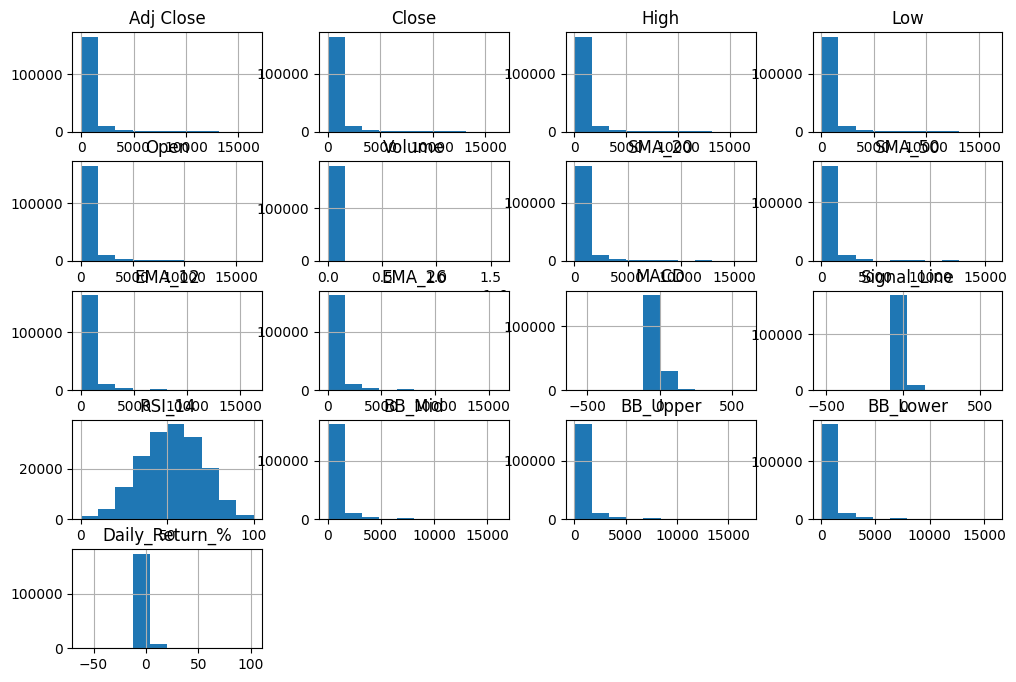

In [ ]:
df.hist(figsize=(12,8))
plt.show()


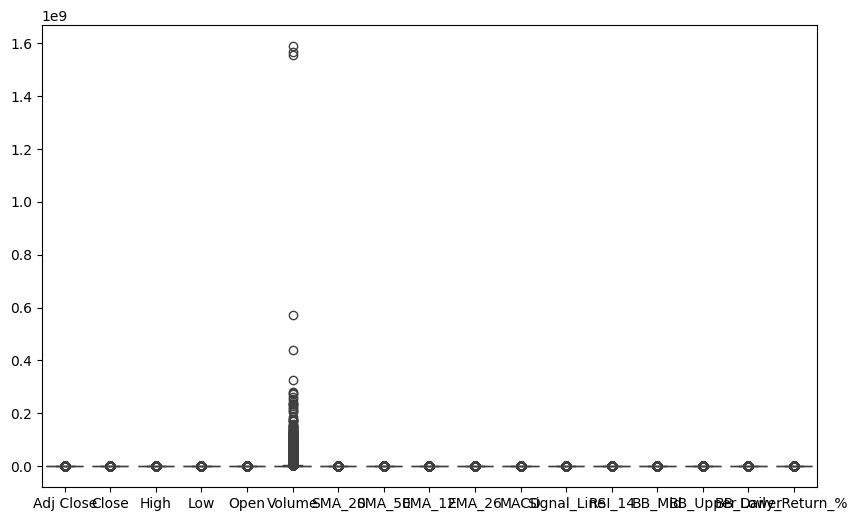

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()


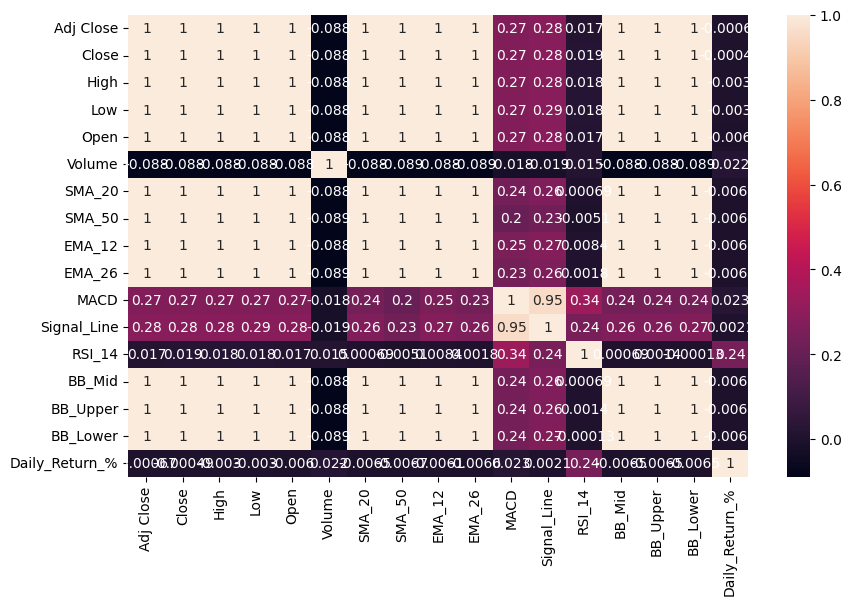

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()